In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [63]:
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [64]:
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [65]:
df_italy = df[df['job_country'] == 'Italy'].dropna(subset='salary_year_avg')

In [66]:
df_italy.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
23705,Data Engineer,Data Engineer,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-02-16 13:29:05,False,False,Italy,year,96773.0,NaN,iGenius,"[sql, nosql, python, scala, crystal, airflow, ...","{'libraries': ['airflow'], 'other': ['flow', '..."
27600,Data Scientist,Data Scientist,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-18 13:41:31,False,False,Italy,year,157500.0,NaN,Satispay,"[python, aws, tensorflow, pytorch, spark]","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
36161,Data Scientist,Stage Data Science (Business Analytics),"San Donato Milanese, Metropolitan City of Mila...",via Ai-Jobs.net,Full-time,False,Italy,2023-12-21 13:36:17,False,False,Italy,year,139000.0,NaN,METRO/MAKRO,None,None
54535,Business Analyst,Business Intelligence Trainee,Italy,via Ai-Jobs.net,Full-time,False,Italy,2023-12-06 06:18:16,False,False,Italy,year,43200.0,NaN,Sisal,"[sql, oracle, flutter, excel, qlik]","{'analyst_tools': ['excel', 'qlik'], 'cloud': ..."
59130,Data Scientist,Data Scientist Manager,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-01-13 06:30:59,False,False,Italy,year,64821.5,NaN,Sia Partners,"[scala, python, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [67]:
top_6_title = df_italy['job_title_short'].value_counts().index[:6].tolist()

In [68]:
top_6_title

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Analyst',
 'Senior Data Scientist']

In [72]:
df_italy = df_italy[df_italy['job_title_short'].isin(top_6_title)]

In [74]:
df_italy.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
23705,Data Engineer,Data Engineer,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-02-16 13:29:05,False,False,Italy,year,96773.0,NaN,iGenius,"[sql, nosql, python, scala, crystal, airflow, ...","{'libraries': ['airflow'], 'other': ['flow', '..."
27600,Data Scientist,Data Scientist,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-18 13:41:31,False,False,Italy,year,157500.0,NaN,Satispay,"[python, aws, tensorflow, pytorch, spark]","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
36161,Data Scientist,Stage Data Science (Business Analytics),"San Donato Milanese, Metropolitan City of Mila...",via Ai-Jobs.net,Full-time,False,Italy,2023-12-21 13:36:17,False,False,Italy,year,139000.0,NaN,METRO/MAKRO,None,None
59130,Data Scientist,Data Scientist Manager,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-01-13 06:30:59,False,False,Italy,year,64821.5,NaN,Sia Partners,"[scala, python, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
81491,Data Scientist,HRIS & Data Analytics Specialist,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-06-09 00:48:45,False,False,Italy,year,56700.0,NaN,Publicis Groupe,[excel],{'analyst_tools': ['excel']}


In [87]:
job_order = df_italy.groupby(['job_title_short'])['salary_year_avg'].median().sort_values(ascending=False).index

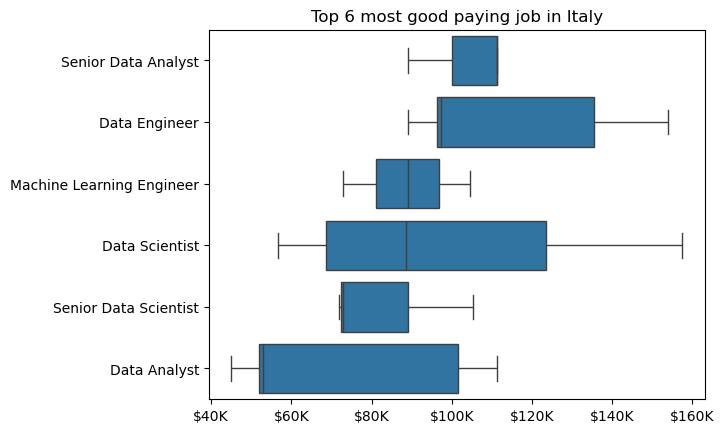

In [88]:
sns.boxplot(df_italy, x='salary_year_avg', y='job_title_short', order=job_order)
plt.xlabel('')
plt.ylabel('')
plt.title('Top 6 most good paying job in Italy')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [105]:
df_da_italy = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Italy')]

In [106]:
df_da_italy.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"[sas, sas, r, python, vba, sql, java, sql serv...","{'analyst_tools': ['sas', 'spss', 'tableau', '..."
321,Data Analyst,Data Analyst Informatica PowerCenter,"Rome, Metropolitan City of Rome, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-21 13:37:45,True,False,Italy,None,NaN,NaN,Beta 80 spa,None,None
330,Data Analyst,Junior Digital Marketing Analyst,"Bologna, Metropolitan City of Bologna, Italy",via BeBee,Full-time,False,Italy,2023-07-26 13:43:55,True,False,Italy,None,NaN,NaN,Randstad Italia Spa,"[html, gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
837,Data Analyst,Junior Data Consultant - Data Analyst,"Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Contractor,False,Italy,2023-09-01 13:54:14,False,False,Italy,None,NaN,NaN,World Food Programme,"[c, python, r, sql, matplotlib, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
1306,Data Analyst,"Data Analyst, Trilogy (Remote) - $100,000/year...",Anywhere,via LinkedIn,Full-time and Contractor,True,Italy,2023-11-06 14:10:56,False,False,Italy,None,NaN,NaN,Crossover,None,None


In [107]:
df_da_italy = df_da_italy.dropna(subset='salary_year_avg')

In [114]:
df_da_italy = df_da_italy.explode('job_skills')

In [109]:
df_da_italy.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
107484,Data Analyst,NLP Expert (Natural Language Processing),"Ispra, VA, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-21 00:12:23,False,False,Italy,year,89100.0,NaN,NRB Group,r,"{'other': ['flow'], 'programming': ['r', 'pyth..."
107484,Data Analyst,NLP Expert (Natural Language Processing),"Ispra, VA, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-21 00:12:23,False,False,Italy,year,89100.0,NaN,NRB Group,python,"{'other': ['flow'], 'programming': ['r', 'pyth..."
107484,Data Analyst,NLP Expert (Natural Language Processing),"Ispra, VA, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-21 00:12:23,False,False,Italy,year,89100.0,NaN,NRB Group,java,"{'other': ['flow'], 'programming': ['r', 'pyth..."
107484,Data Analyst,NLP Expert (Natural Language Processing),"Ispra, VA, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-21 00:12:23,False,False,Italy,year,89100.0,NaN,NRB Group,flow,"{'other': ['flow'], 'programming': ['r', 'pyth..."
122754,Data Analyst,Data Analyst for Consumer Sensors,"Milan, Metropolitan City of Milan, Italy",via Ai-Jobs.net,Full-time,False,Italy,2023-04-14 08:54:15,False,False,Italy,year,53014.0,NaN,Bosch Group,matlab,"{'analyst_tools': ['tableau'], 'libraries': ['..."


In [162]:
df_top_salary = df_da_italy.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(ascending=False, by='median')

In [156]:
df_top_skills = df_da_italy.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(ascending=False, by='count')

In [157]:
df_top_skills = df_top_skills.head(10).sort_values(by='median', ascending=False)

In [158]:
df_top_skills

,count,median
job_skills,,
aws,1,102500.0
sql,6,101500.0
r,3,100500.0
python,7,89100.0
oracle,2,81094.5
tableau,4,76757.0
bigquery,2,75757.0
java,2,70057.0
spark,1,53014.0


In [163]:
df_top_salary = df_top_salary.head(10)

In [164]:
df_top_salary

,count,median
job_skills,,
sap,1,111175.0
aws,1,102500.0
azure,1,102500.0
looker,1,102500.0
sql,6,101500.0
crystal,1,100500.0
r,3,100500.0
qlik,1,100500.0
python,7,89100.0


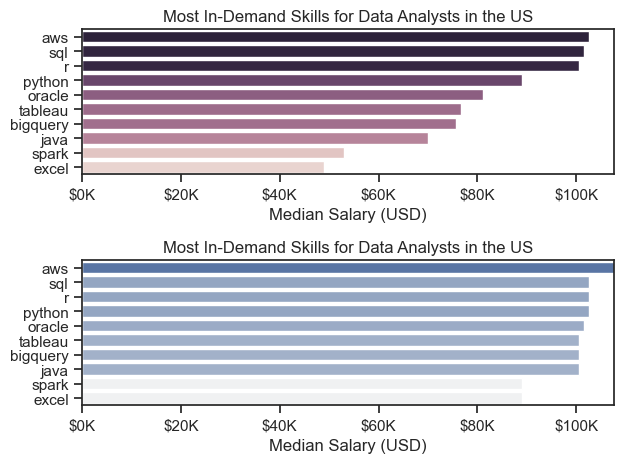

In [165]:
fig, ax = plt.subplots(2,1)
sns.barplot(data=df_top_skills, x='median', y= df_top_skills.index, ax=ax[0], hue='median')
ax[0].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[0].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary (USD)')
ax[0].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_top_salary, x='median', y=df_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()